 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_daily_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_daily_returns.head()

/var/folders/5m/m6s8th494sv8gkdplsssztdm0000gn/T/ipykernel_41608/1981202142.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_daily_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_daily_returns.dropna(inplace=True)
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_daily_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_daily_returns.head()    

/var/folders/5m/m6s8th494sv8gkdplsssztdm0000gn/T/ipykernel_41608/2963844464.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_daily_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_daily_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_daily_returns.dropna(inplace=True)
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_returns_csv = Path("Resources/sp500_history.csv")
sp500_returns_df = pd.read_csv(sp500_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns_df.sort_index(inplace=True)
sp500_returns_df.head()

/var/folders/5m/m6s8th494sv8gkdplsssztdm0000gn/T/ipykernel_41608/3684930709.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_returns_df = pd.read_csv(sp500_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
/var/folders/5m/m6s8th494sv8gkdplsssztdm0000gn/T/ipykernel_41608/3684930709.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_returns_df = pd.read_csv(sp500_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_returns_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_returns_df['Close'] = sp500_returns_df['Close'].str.replace('$', '').astype('float')
sp500_returns_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Calculate Daily Returns
sp500_daily_returns = sp500_returns_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close":"SP500"})
sp500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
full_portfolio_returns = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis="columns", join="inner")
full_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

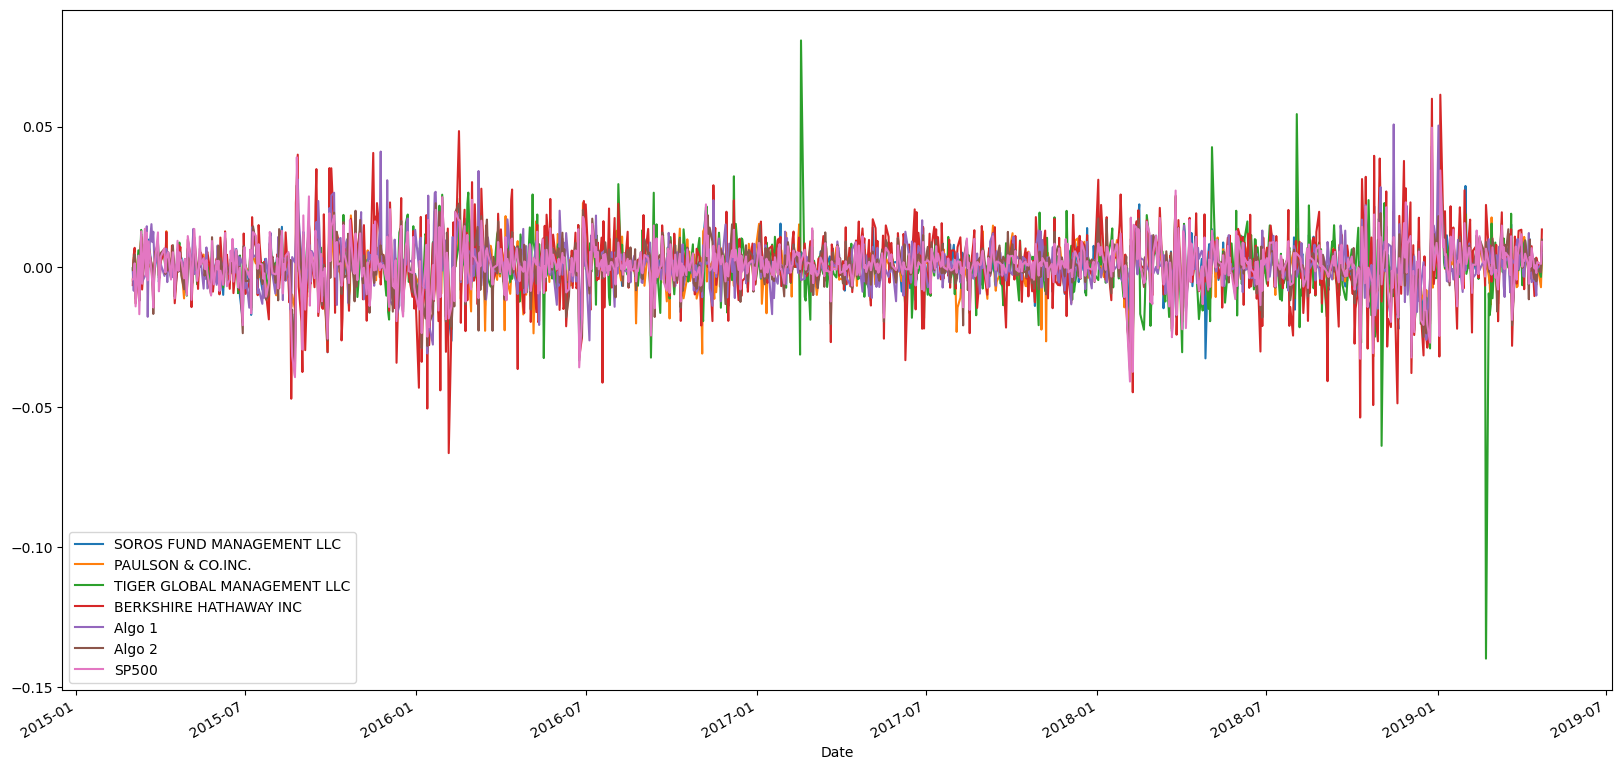

In [16]:
# Plot daily returns of all portfolios
full_portfolio_returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

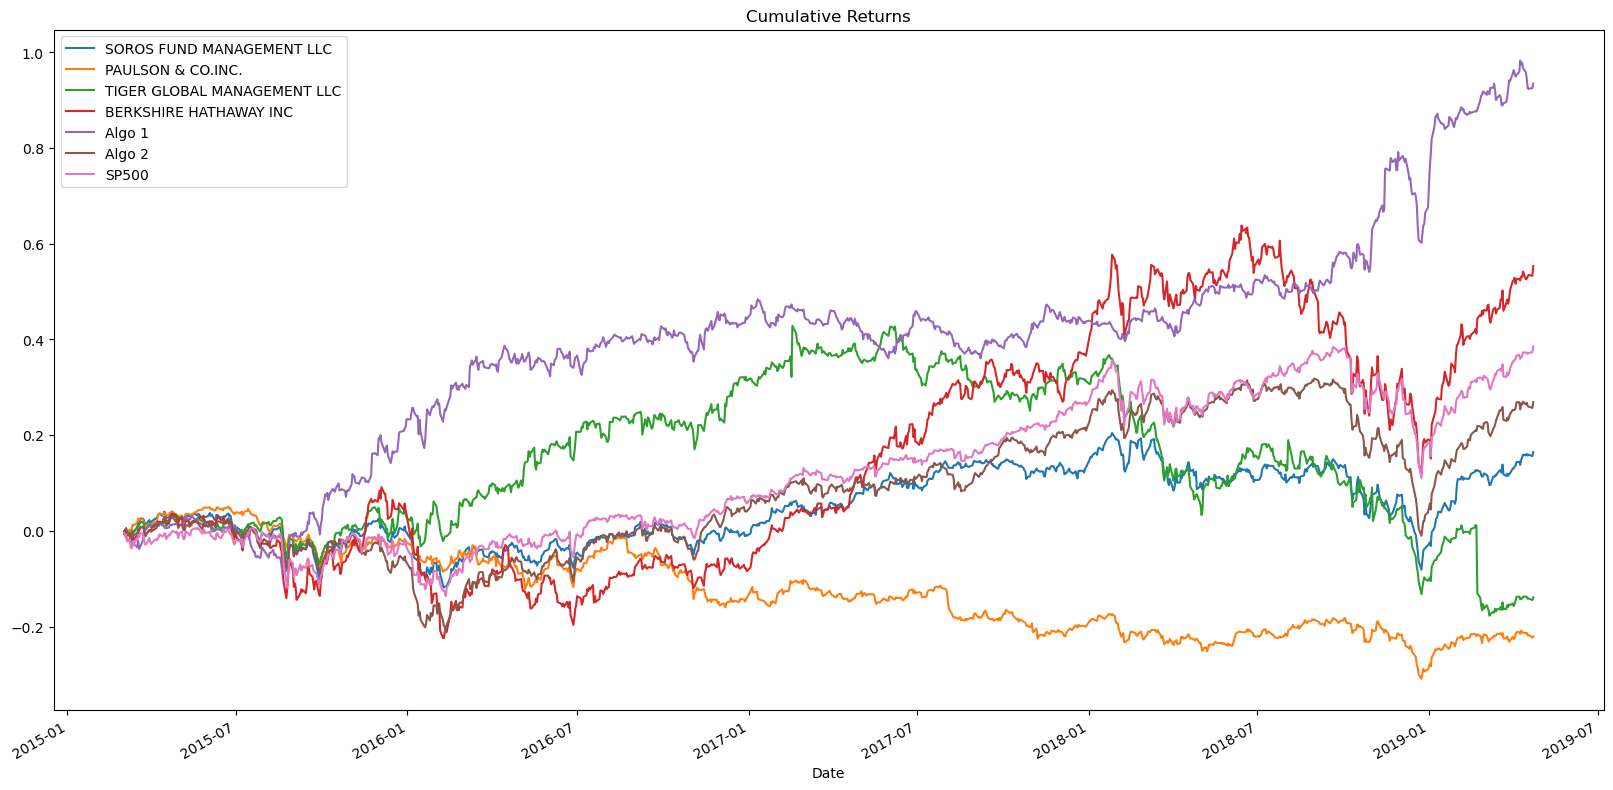

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + full_portfolio_returns).cumprod() - 1
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

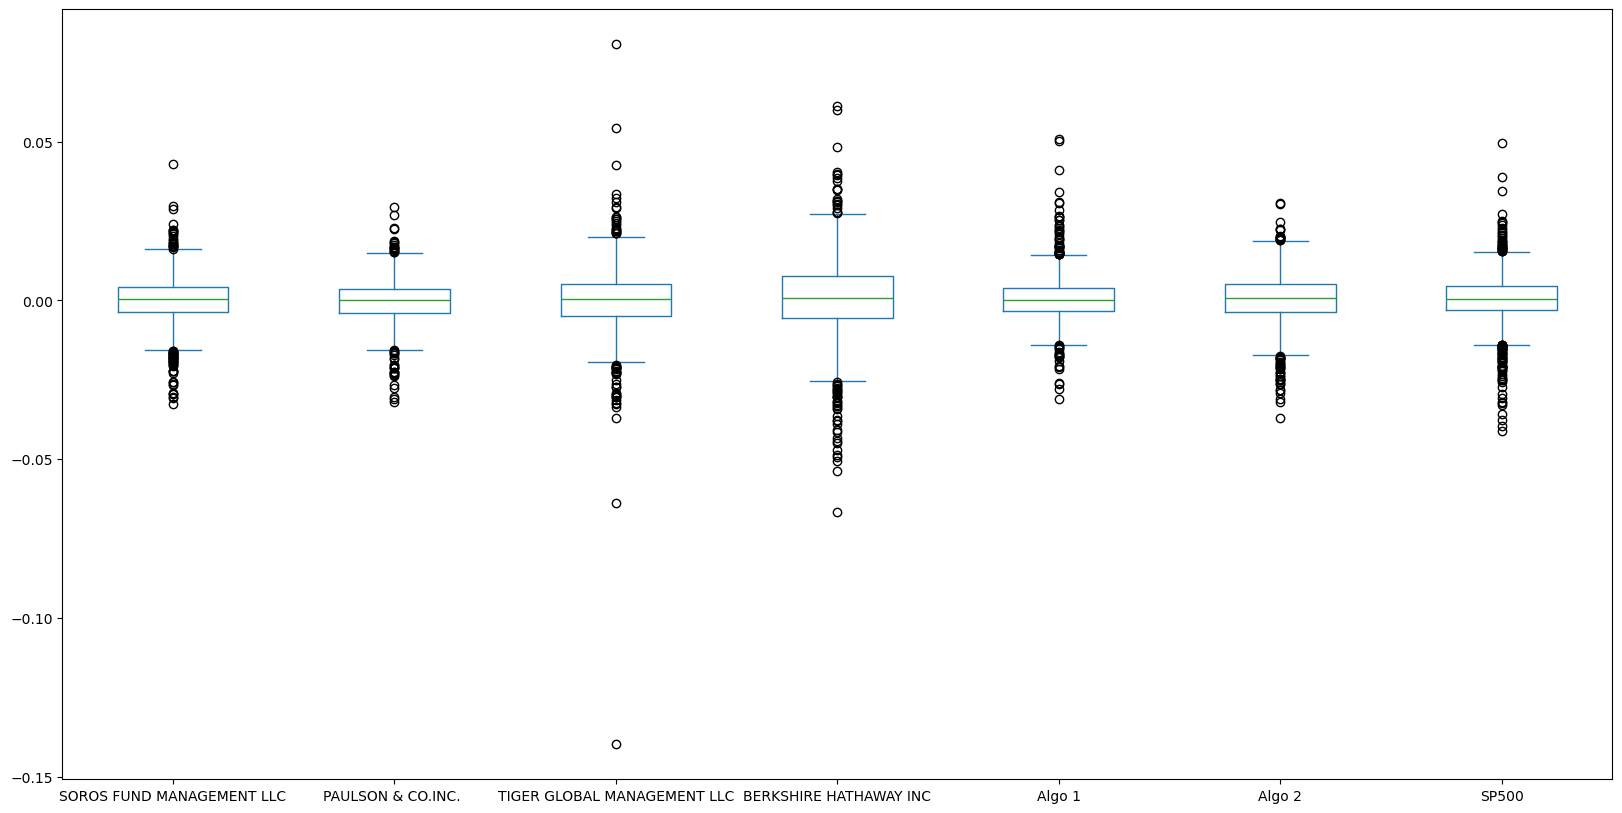

In [18]:
# Box plot to visually show risk
full_portfolio_returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
full_portfolio_std = full_portfolio_returns.std()
full_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
full_portfolio_std["SP500"] = round(full_portfolio_std["SP500"], 6)
full_portfolio_std["SP500"]

# Determine which portfolios are riskier than the S&P 500
full_portfolio_std[(full_portfolio_std["SP500"] < full_portfolio_std)]


TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = full_portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135791
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

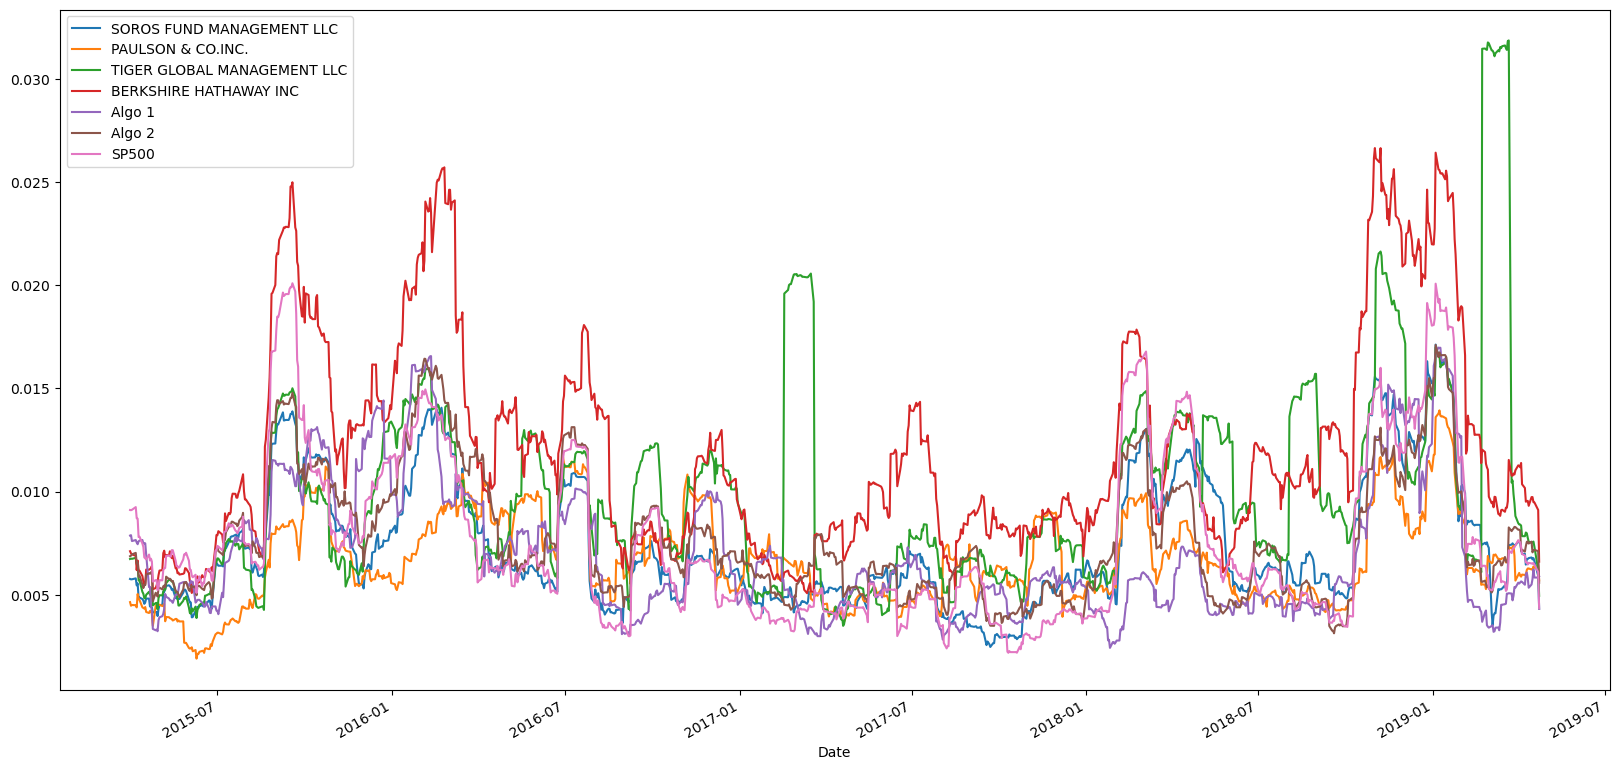

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_rolling = full_portfolio_returns.rolling(window=21).std()

# Plot the rolling standard deviation
portfolio_rolling.plot(figsize = (20,10))

### Calculate and plot the correlation

<Axes: >

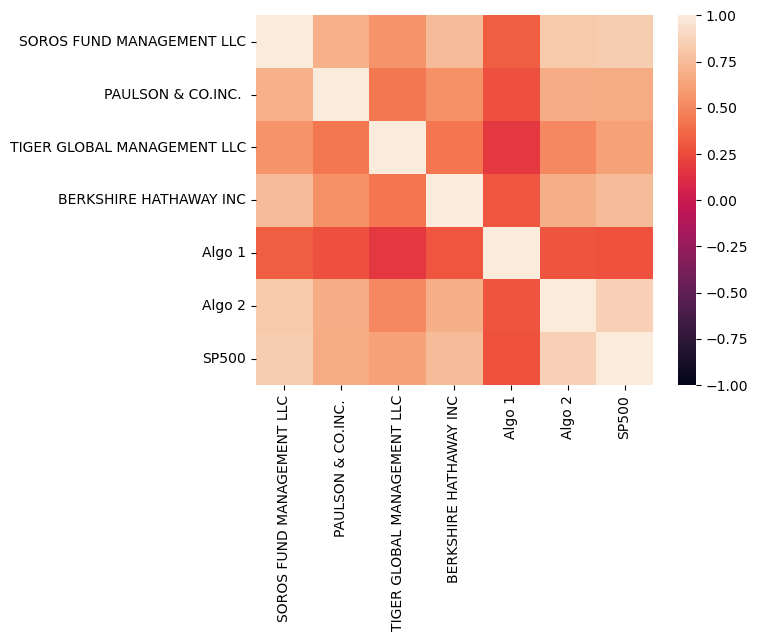

In [25]:
# Calculate the correlation
full_correlation = full_portfolio_returns.corr()

# Display de correlation matrix
sns.heatmap(full_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

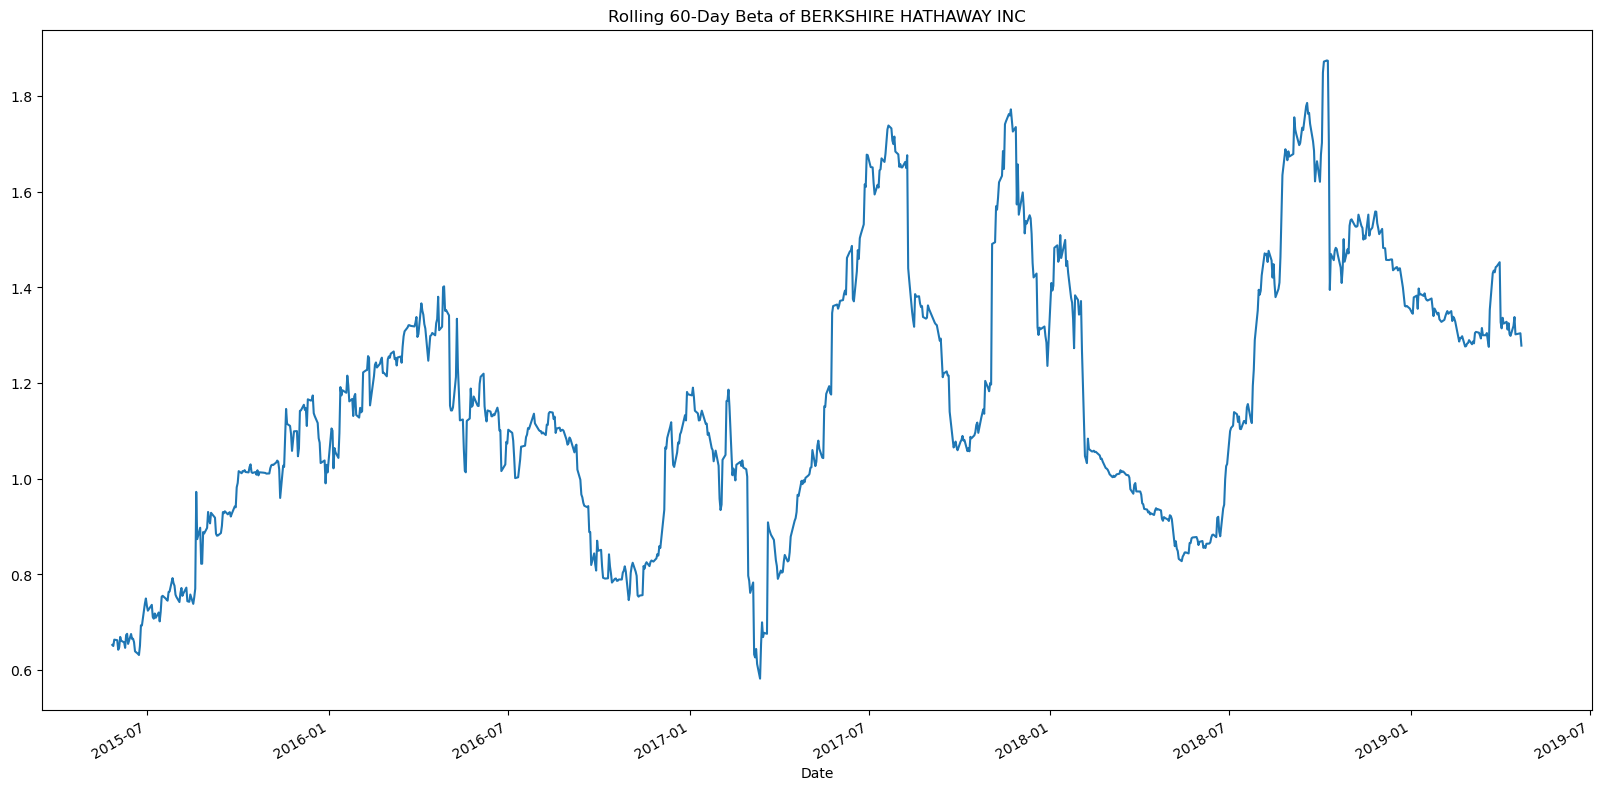

In [ ]:
# Calculate covariance of a single portfolio
covariance_bh = full_portfolio_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(full_portfolio_returns["SP500"])

# Calculate variance of S&P 500
variance_sp500 = full_portfolio_returns["SP500"].rolling(window=60).var()

# Computing beta
rolling_beta = covariance_bh/variance_sp500

# Plot beta trend
rolling_beta.plot(figsize = (20, 10), title = "Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window
full_portfolio_returns.ewm(span= 21).std().mean()


SOROS FUND MANAGEMENT LLC      0.007318
PAULSON & CO.INC.              0.006698
TIGER GLOBAL MANAGEMENT LLC    0.009870
BERKSHIRE HATHAWAY INC         0.011899
Algo 1                         0.006956
Algo 2                         0.007762
SP500                          0.007699
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = (full_portfolio_returns.mean()*252)/(full_portfolio_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

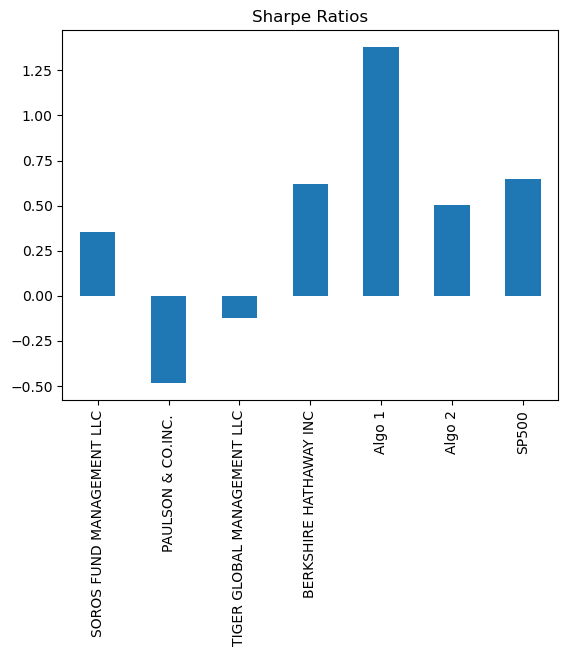

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on the bar graph, it looks like Algo 1 outperformed the market and the whales portfolios. Whereas Algo 2 fell below the market and Berkshire Hathaway (but was still able to outpeform the rest of the whales portfolios).

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock
aapl_path = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.head()     


/var/folders/5m/m6s8th494sv8gkdplsssztdm0000gn/T/ipykernel_40459/783418694.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(aapl_path, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [ ]:
# Reading data from 2nd stock
cost_path = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.head()

/var/folders/5m/m6s8th494sv8gkdplsssztdm0000gn/T/ipykernel_40459/4271281372.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_df = pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [ ]:
# Reading data from 3rd stock
goog_path = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_path, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.head()

/var/folders/5m/m6s8th494sv8gkdplsssztdm0000gn/T/ipykernel_40459/4019257851.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_df = pd.read_csv(goog_path, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [ ]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([aapl_df, cost_df, goog_df], axis="columns", join= "inner")
my_portfolio.sort_index(ascending=True, inplace=True)
my_portfolio.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59


In [ ]:
# Reset Date index
my_portfolio.reset_index(level='Trade DATE', inplace=True)

In [ ]:
# Reorganize portfolio data by having a column per symbol
my_portfolio.set_index('Trade DATE', inplace= True)
my_portfolio.drop(columns = ['Symbol'], inplace = True)
my_portfolio.columns = ["AAPL", "COST", "GOOG"]
my_portfolio.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [ ]:
# Calculate daily returns
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.head()

# Drop NAs
my_portfolio_returns.dropna(inplace=True)

# Display sample data
my_portfolio_returns.head()


,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_return = my_portfolio_returns.dot(weights)

# Display sample data
weighted_return.head()


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat([weighted_return, full_portfolio_returns], axis="columns", join="inner")
portfolio_returns.rename(columns={0: "MY PORTFOLIO"}, inplace=True)
portfolio_returns.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
annual_portfolio_std = portfolio_returns.std() * np.sqrt(252)
annual_portfolio_std

MY PORTFOLIO                   0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500                          0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: >

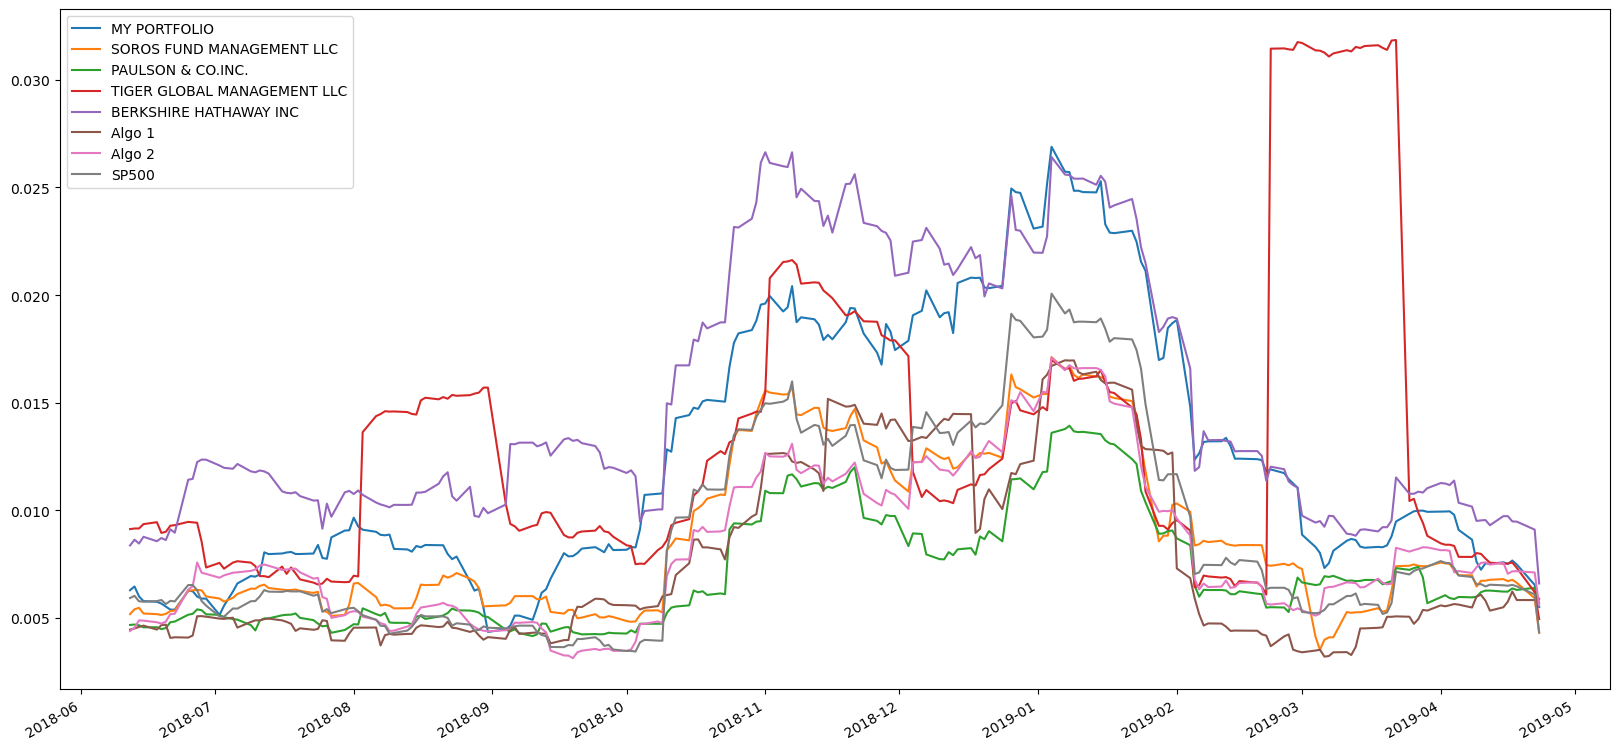

In [ ]:
# Calculate rolling standard deviation
rolling_std = portfolio_returns.rolling(window= 21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<Axes: >

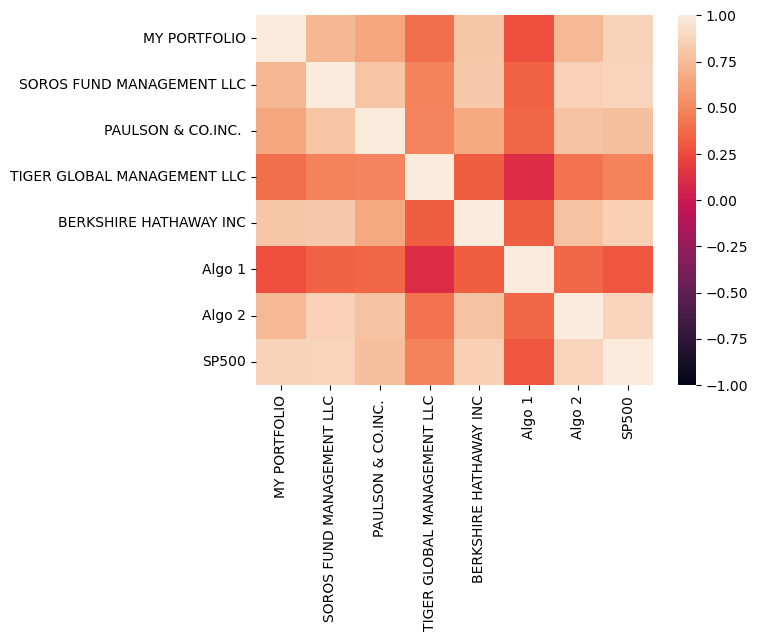

In [ ]:
# Calculate and plot the correlation
correlation = portfolio_returns.corr()

sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-day Beta of My Portfolio vs. S&P 500'}>

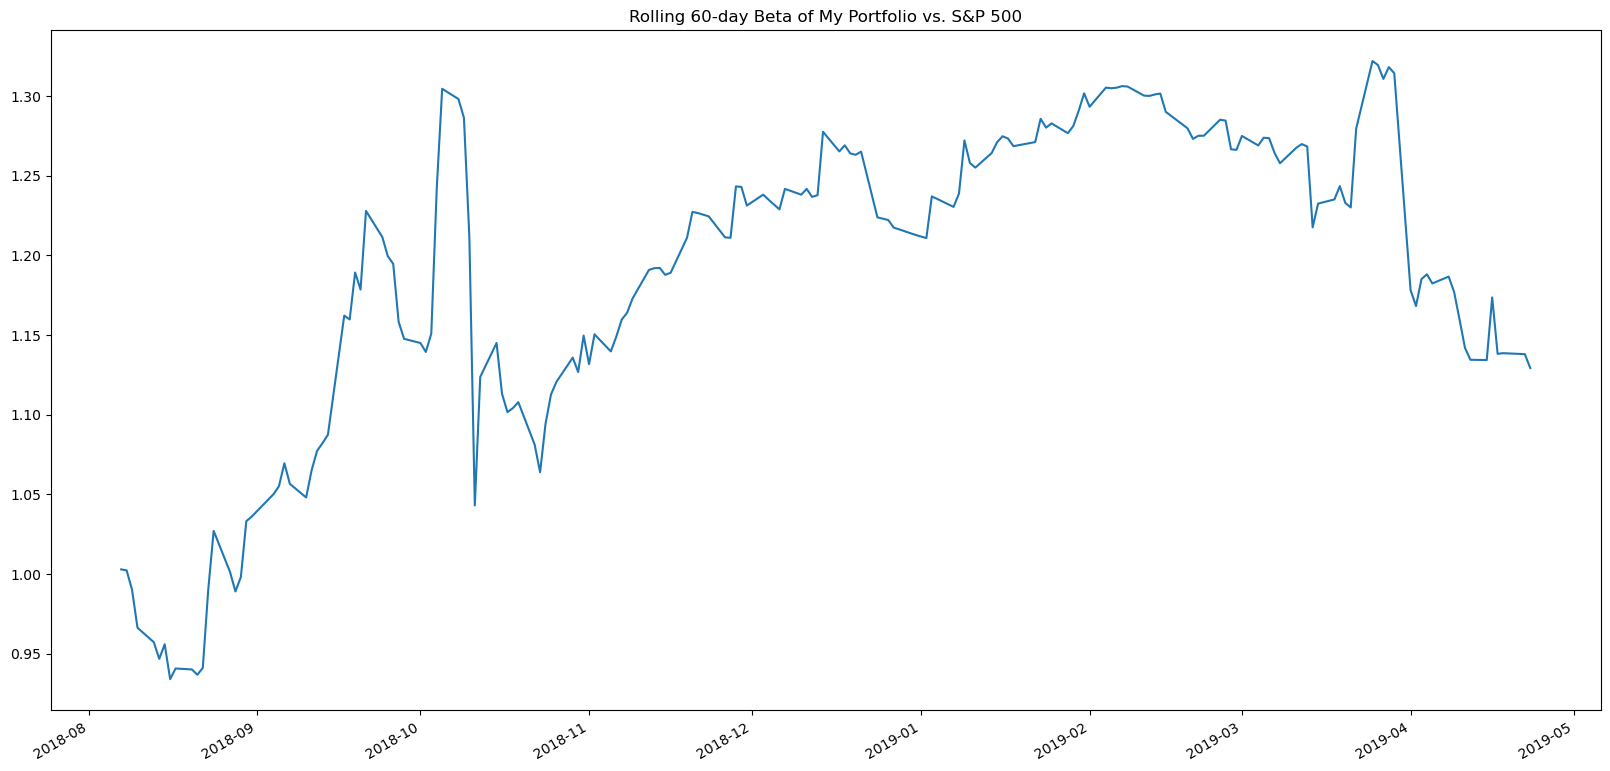

In [ ]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns["MY PORTFOLIO"].rolling(window=60).cov(portfolio_returns["SP500"])
rolling_variance = portfolio_returns["SP500"].rolling(window=60).var()
rolling_portfolio_beta = rolling_covariance / rolling_variance
rolling_portfolio_beta.plot(figsize = (20,10), title = "Rolling 60-day Beta of My Portfolio vs. S&P 500")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
portolio_sharpe_ratio = (portfolio_returns.mean() * 252)/(portfolio_returns.std() * np.sqrt(252))
portolio_sharpe_ratio

MY PORTFOLIO                   0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

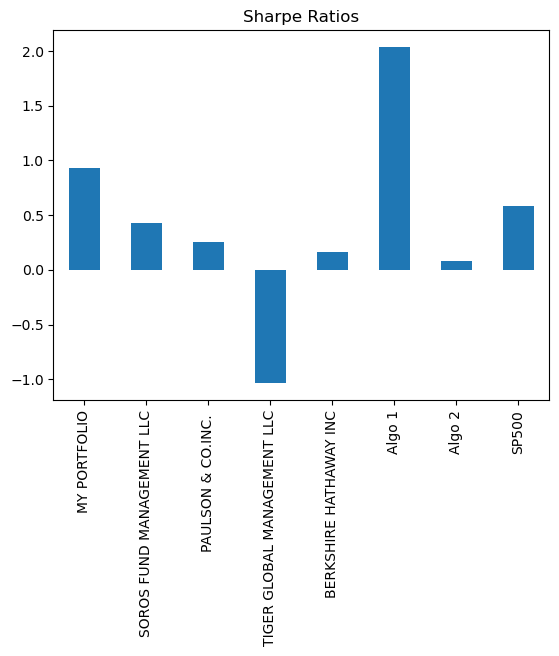

In [ ]:
# Visualize the sharpe ratios as a bar plot
portolio_sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratios")

### How does your portfolio do?

Based on my portfolio's sharpe ratio, it seems like it performed okay but not great. However compared to the other portfolios, my portfolio ranked 2nd in terms of performance. Algo 1 lead all portfolios with an impressive sharpe ratio of about 2.04 . 